Visualisations

1. Import Files
2. 
3. EDA & Descriptive Analysis
4. 
  2.1 Analyse Orders Day of Week
   
  2.2 Analyse Prices Distribution using Histogram
  
  2.3 Analyse Prices vs Orders day of the week
  
  2.4 Analyse Order Number
  
  2.5 Analyse Customer Loyalty Types
  
  2.6 Analyse Order Number vs Prices
  
  2.7 Age vs Dependents

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

1. Import Files

In [2]:
# path to project folder,import the file and compress the numeric values where possible
path = r"C:\Users\Acer\Desktop\Instacart Basket Analysis"

df_ords_customers = pd.read_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prods_customers_left.pkl'))
df_ords_customers.shape

(32404859, 34)

In [3]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   product_id              int64         
 1   product_name            object        
 2   aisle_id                int64         
 3   department_id           int64         
 4   prices                  float32       
 5   order_id                int64         
 6   user_id                 object        
 7   eval_set                object        
 8   order_number            int64         
 9   orders_day_of_week      int64         
 10  hour_of_day_ordered     int64         
 11  days_since_prior_order  float64       
 12  add_to_cart_order       int64         
 13  reordered               int64         
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  

2. EDA & Descriptive Analysis

2.1 Analyse Orders Day of Week

In [5]:
# count rows for each day of the week
df_ords_customers['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

2.11 Distribution bar graph

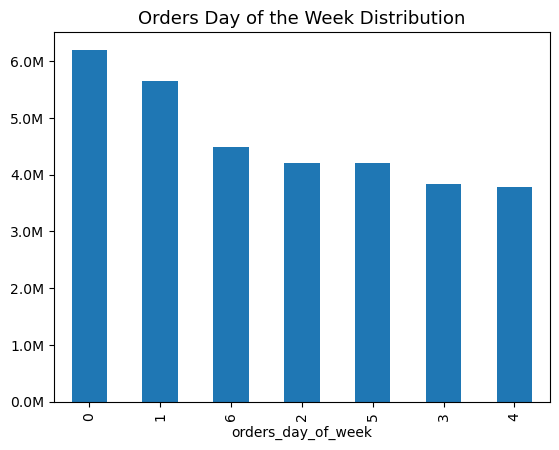

In [7]:
# plot a bar chart on orders_days_of_week value counts to see the distribution. Sorted by largest to smallest
plt.title('Orders Day of the Week Distribution', fontsize=13)
ax=df_ords_customers['orders_day_of_week'].value_counts().plot.bar()

#formats y-axis as M (millions)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'M'))

In [8]:
# bar chart of orders_days_of_week distribution sorted by orders_days_of_week

#formats y-axis as M (millions)
plt.title('Orders Day of the Week Distribution', fontsize=13)
bar_odow = df_ords_customers['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['green'], x='orders days of the week', ylabel='frequency')
bar_odow.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

2.12 Export the bar graph

In [9]:
bar_odow.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_dow.png'))

2.2 Analyse Prices Distribution using Histogram

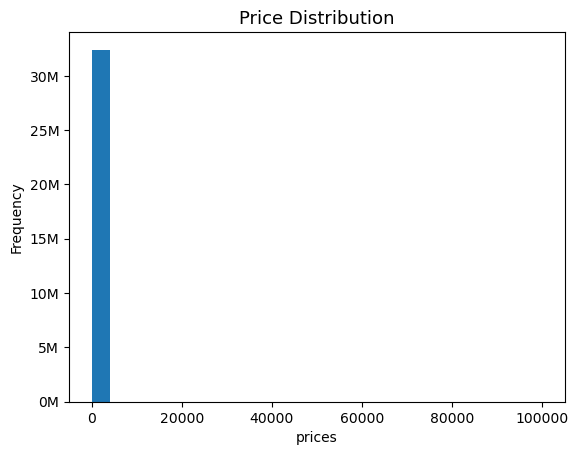

In [10]:
# historgram of prices using 25 bins
plt.title('Price Distribution', fontsize=13)
bar_prices = df_ords_customers['prices'].plot.hist(bins=25, xlabel='prices')
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.0f')+'M'))

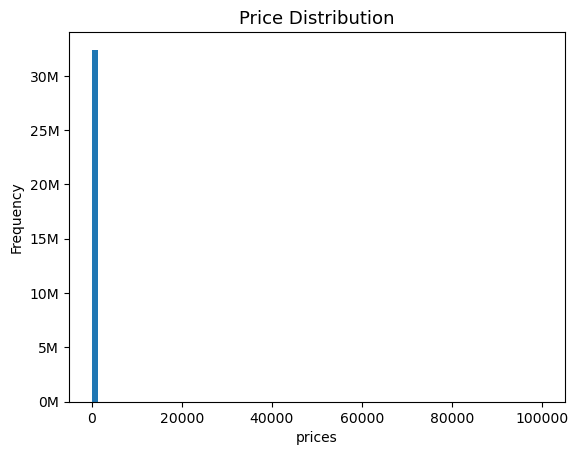

In [11]:
# historgram of prices using 70 bins
bar_prices = df_ords_customers['prices'].plot.hist(bins=70, xlabel='prices')
plt.title('Price Distribution', fontsize=13)
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.0f')+'M'))

Export the histogram

In [12]:
bar_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/prices_hist.png'))

2.3 Analyse Prices vs Orders day of the week

Split the dataframes to 70/30

In [13]:
# spliting dataframes into 70/30 by assigning 'True' to random number less than 0.7 and 'False' to more

#create the random seed so its replicable
np.random.seed(4)

#create a list of (True, False) values based on random assignment of values between 0-1 and is less than 0.7
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [14]:
# Stores 70% of data sample in big dataframe (<= 0.7)
big = df_ords_customers[dev]

In [15]:
# Stores 30% of data sample in small dataframe (> 0.7)
small = df_ords_customers[~dev]

In [16]:
# Checking the length of the dataframes
big_len = len(big)
small_len = len(small)

big_len + small_len

32404859

In [17]:
len(df_ords_customers)

32404859

Plot line chart of orders_days_of_week and prices

In [19]:
# To plot the graph, extracting orders_day_of_week and prices
df_2 = small[['orders_day_of_week', 'prices']]
df_2.head()

orders_day_of_week  prices
0                    6     5.8
2                    0     5.8
3                    3     5.8
6                    2     5.8
10                   5     5.8

C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


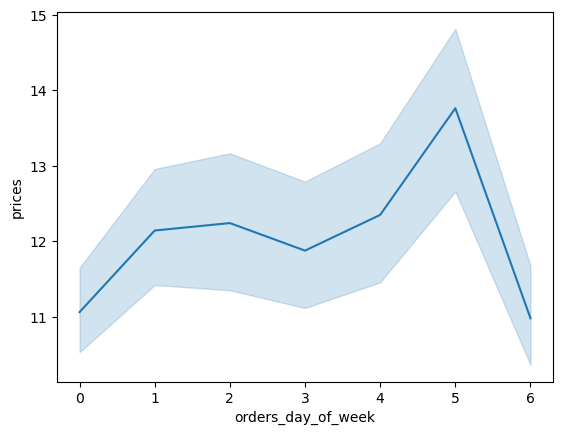

In [21]:
line = sns.lineplot(x='orders_day_of_week', y='prices', data=df_2)

In [22]:
line.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_orders_day_vs_prices.png'))

In [23]:
#df_3 = big[['orders_days_of_week', 'prices']]
#line = sns.lineplot(x='orders_days_of_week', y='prices', data=df_3)

2.4 Analyse Order Hour of Day

In [24]:
df_ords_customers.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id user_id eval_set  order_number  orders_day_of_week  ...  \
0   3139998     138    prior            28                   6  ...   
1   1977647     138    prior            30                   6  ...   
2    389851     709    prior             2                   0  ...   
3    652770     764    prior             1                   3  ...   
4   1813452     764    prior             3                   4  ...   

   mean_expenses  first_name  last_name  gender      state age date_joined  \
0            5.8     Charles        Cox    Male  Minnesota  81  2019-08-01   
1            5.8     Charles        Cox    Male  Minnesota  81  2019-08-01   
2            5.8     Deborah      Glass  Female    Vermont  66  2018-06-16   
3            5.8     Heather      Myers  Female  Wisconsin  40  2020-02-09   
4            5.8     Heather      Myers  Female  Wisconsin  40  2020-02-09   

  n_dependants  fam_status  income  
0            1     married   49620  
1            1     married   49620  
2            2     married  158302  
3            3     married   31308  
4            3     married   31308  

[5 rows x 34 columns]

In [26]:
df_ohoy = df_ords_customers[['order_number']]

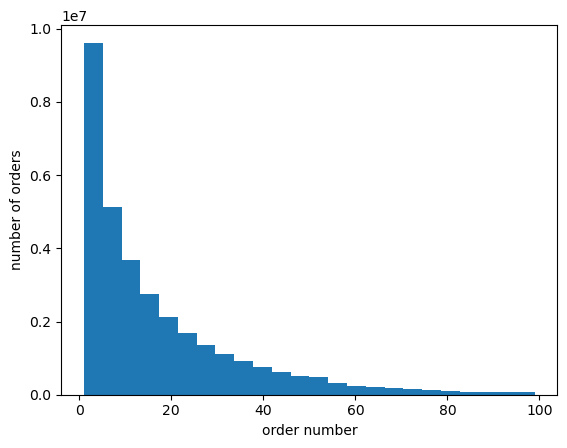

In [27]:
hist_ohoy = df_ohoy['order_number'].plot.hist(bins=24, xlabel='order number', ylabel='number of orders')

Export the histogram

In [28]:
hist_ohoy.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_number_distribution.png'))

In [29]:
df_ohoy['order_number'].value_counts()

order_number
1     2076096
3     2048868
2     2046409
4     1818609
5     1626901
       ...   
95      14516
96      13737
97      13356
98      12851
99      12421
Name: count, Length: 99, dtype: int64

2.5 Analyse Customer Loyalty Types

Distribution of customer loyalty type using bar graph

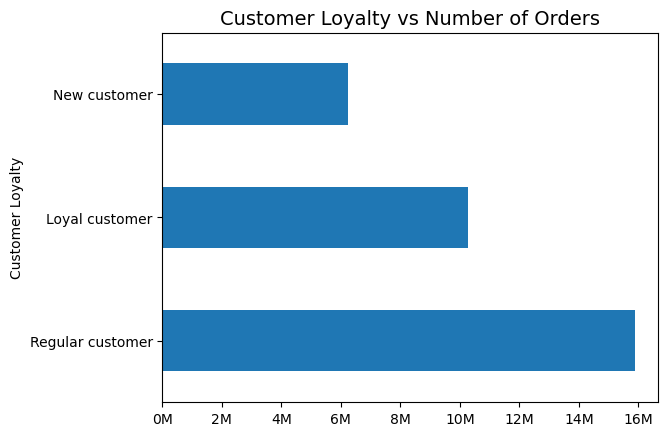

In [30]:
# horizontal bar graph loyalty flag vs count of orders per loyalty flag
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", x="Number of Orders")

plt.title("Customer Loyalty vs Number of Orders", fontsize=14)
bar_loyal.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

Export the bar graph

In [31]:
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_loyalty_flag_distribution.png'))

In [32]:
# checking the order count of loyalty flags
df_ords_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [33]:
# calculating percentages of each customer loytalty type
print("Regular Customer: " + str((15876776 / (15876776+10284093+6243990)*100)) + "%")
print("Loyal Customer: " + str((10284093 / (15876776+10284093+6243990)*100)) + "%")
print("New Customer: " + str((6243990 / (15876776+10284093+6243990)*100)) + "%")

Regular Customer: 48.995047316823694%
Loyal Customer: 31.736268317044676%
New Customer: 19.268684366131637%


Observations:

Regular customers made most orders (49%)

New customers made the least orders (19%)

Loyalty customers madde 32% of orders

2.6 Analyse Order Hours of Day vs Prices

Extract order_number and prices from sample "small" df

In [34]:
# extracting relevant columns and checking the dataframe
df_small_ohod_prices = small[['order_number', 'prices']]
df_small_ohod_prices.head()

order_number  prices
0             28     5.8
2              2     5.8
3              1     5.8
6              3     5.8
10             1     5.8

In [35]:
# Create a line graph to check correlation between order number and prices
line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='order_number', y='prices')
line_ohod_prices.set(xlabel='order number')
plt.title('Order number vs prices')
plt.grid()

C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [36]:
line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_order_number_vs_prices.png'))

2.7 Age vs Dependents

Extract age and depenandants

In [37]:
# Extract age and depenandants into a dataframe
df_age_dependants = df_ords_customers[['age','n_dependants']]

In [38]:
df_age_dependants.head()

age  n_dependants
0   81             1
1   81             1
2   66             2
3   40             3
4   40             3

Line Graph : Age vs No of Dependants

In [39]:
# create a line graph using seaborn to check for correlation
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Age vs Number of Dependants')
plt.grid()

C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Export line graph

In [40]:
line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_age_ndependants.png'))

Insight

There is no correlation between age and number of dependants

Number of customers by family status using bar graph

In [41]:
# extract fam_status and user_id into separate dataframe
df_fam_status_dependants = df_ords_customers[['fam_status','user_id']]
df_fam_status_dependants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   fam_status  object
 1   user_id     object
dtypes: object(2)
memory usage: 494.5+ MB


In [42]:
## Count unique users per fam_status
fam_users_no = df_fam_status_dependants.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})
fam_users_no

fam_status  user_id
0                  divorced/widowed    17640
1  living with parents and siblings     9701
2                           married   144906
3                            single    33962

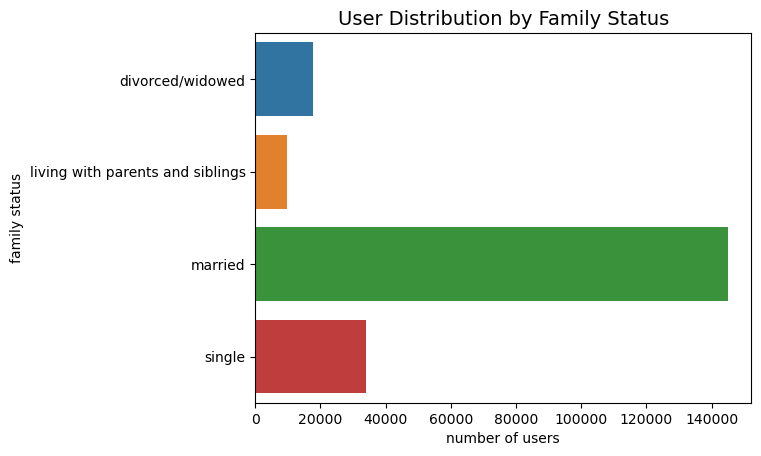

<Figure size 900x1100 with 0 Axes>

In [43]:
# Create a bar graph to show the user distribution based on family status
bar_fam_users = sns.barplot(y='fam_status', x='user_id', data=fam_users_no)
bar_fam_users.set(ylabel='family status', xlabel='number of users')
plt.title('User Distribution by Family Status', fontsize=14)
fig = plt.figure(figsize=(9, 11))

Export Bar Graph

In [44]:
bar_fam_users.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam_users.png'), bbox_inches = 'tight')

Insight: Significant number of users are married, followed by single

2.7 Age vs Income (Spending power)

Extract age and income

In [45]:
# Extract age and income into a separate dataframe
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

age  income
0   81   49620
1   81   49620
2   66  158302
3   40   31308
4   40   31308

Scatterplot: Age vs Income

[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

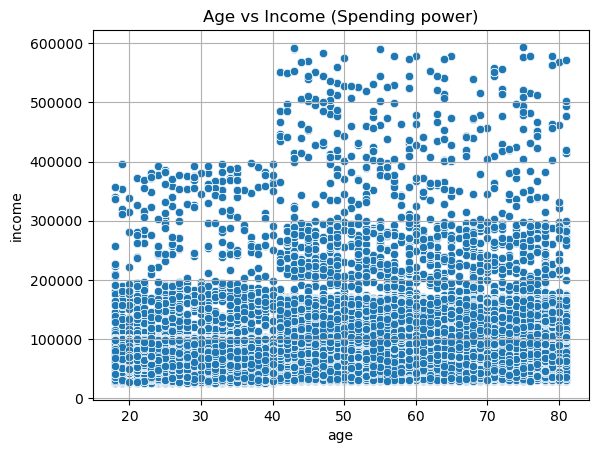

In [46]:
# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age vs Income (Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

Export scatterplot

In [47]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_age_income.png'))

Insights:

Ages between 18 to 40 have lower spending power compared to above 40

Customers between 18 and 40 have income less than 400,000. Larger subset of customers have less than 200,000

Customers above 40 surpass 400,000 and earn upto 600,000